# Análise de desempenho dos alunos que fizeram ENEM

* Com base nas médias dos alunos na parte objetiva do Enem 2018 serão criados uma tabela e um gráfico para analisar o desempenho dos alunos por renda familiar mensal.

* Será feita uma verificação com base nas 100 maiores médias na parte objetiva do Enem 2018 separando quem tem acesso a Internet e quem não tem a fim de checar se este fato pode ter alguma influência na nota final.

--------------------------------------------------------------

* Repositório: https://github.com/gsoare2/analise_desempenho_enem
* Dicionário de dados: https://www.dropbox.com/sh/t3qy4juq7sc39jp/AADuFdVRKzurn_RzZdyyTqYla/Dicion%C3%A1rio_Microdados_Enem_2017.xlsx?dl=0

In [1]:
import pandas as pd
import numpy as np
import functools
import operator
%matplotlib inline
low_memory=False

In [2]:
filename = 'MICRODADOS_ENEM_2018.csv'

In [3]:
exam_average = pd.read_csv(filename, delimiter=';', encoding='iso-8859-1',
                            usecols=['NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_CN','Q025','Q006'])

In [4]:
exam_average = exam_average.dropna()

In [5]:
exam_average['MÉDIA'] = exam_average.mean(axis=1)

In [6]:
exam_average.rename(columns={'NU_NOTA_MT': 'MATEMÁTICA',
                   'NU_NOTA_CN': 'CIÊNCIAS NATURAIS',
                   'NU_NOTA_CH': 'CIÊNCIAS HUMANAS',
                   'NU_NOTA_LC': 'LINGUAGEM e CÓDIGO',
                   'Q025': 'ACESSO_INTERNET',
                   'Q006': 'RENDA MENSAL'}, inplace=True)

In [7]:
exam_average.sort_values(by='MÉDIA', ascending=False).iloc[0:100]

,CIÊNCIAS NATURAIS,CIÊNCIAS HUMANAS,LINGUAGEM e CÓDIGO,MATEMÁTICA,RENDA MENSAL,ACESSO_INTERNET,MÉDIA
5365820,809.1,850.4,779.7,955.9,C,B,848.775
1231303,869.6,796.2,692.5,994.4,M,B,838.175
2410529,831.4,850.4,725.9,943.2,H,B,837.725
414829,855.2,776.8,715.5,990.7,P,B,834.550
3204960,839.1,825.8,705.4,964.8,Q,B,833.775
...,...,...,...,...,...,...,...
2716594,801.4,754.6,682.2,983.9,O,B,805.525
3574858,784.4,765.6,697.4,974.2,Q,B,805.400
1014405,830.7,800.5,714.8,875.3,I,B,805.325
165773,774.1,825.8,754.3,866.8,H,A,805.250


## Renda Familiar

Tendo como base as médias da parte objetiva do Enem 2018, foi criada uma tabela relacionando as informações da média geral por nível de renda familiar mensal e quantos alunos se encontram em cada um destes níveis. Para melhor comparação, estas informações são exibidas em dois gráficos, um traçando a curva entre a renda e a média geral e o outro representando a relação da quantidade de alunos por nível de renda.

Legenda:

 * A ->    Nenhuma renda.
 * B ->	   Até 954,00 reais.
 * C ->    De 954,01 até 1.431,00 reais.
 * D ->	   De 1.431,01 até 1.908,00 reais.
 * E ->	   De 1.908,01 até 2.385,00 reais.
 * F ->	   De 2.385,01 até 2.862,00 reais.
 * G ->    De 2.862,01 até 3.816,00 reais.
 * H ->	   De 3.816,01 até 4.770,00 reais.
 * I  ->   De 4.770,01 até 5.724,00 reais.
 * J ->	   De 5.724,01 até 6.678,00 reais.
 * K ->	   De 6.678,01 até 7.632,00 reais.
 * L ->	   De 7.632,01 até 8.586,00 reais.
 * M ->	   De 8.586,01 até 9.540,00 reais.
 * N ->	   De 9.540,01 até 11.448,00 reais.
 * O ->    De 11.448,01 até 14.310,00 reais.
 * P ->	   De 14.310,01 até 19.080,00 reais.
 * Q ->	   Mais de 19.080,00 reais.

In [8]:
mediaPorRenda = exam_average.pivot_table(values=['MÉDIA'], index=['RENDA MENSAL'], aggfunc={'MÉDIA': [np.mean,'count']})
mediaPorRenda

MÉDIA            
               count        mean
RENDA MENSAL                    
A             153283  493.268844
B             891153  498.026032
C             979903  515.448829
D             364313  531.202684
E             360081  536.575649
F             175316  550.248588
G             276106  556.358702
H             167665  569.867083
I             138437  578.644383
J              82322  588.126286
K              52620  593.667479
L              42056  601.064145
M              37279  603.952882
N              53790  611.082144
O              39012  618.057835
P              35383  624.625639
Q              45024  633.373682

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D8D1610>,
      dtype=object)

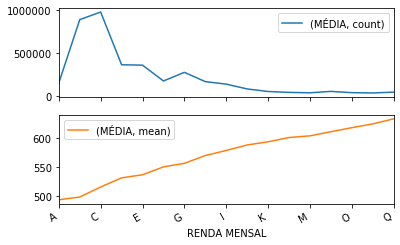

In [9]:
mediaPorRenda.plot.line(subplots=True)

## Acesso a Internet

Foi feita uma checagem entre as 100 maiores médias do Enem 2018 separando quem tem acesso a Internet e quem não tem a fim de mensurar qual influência este fato tem na nota final.

Indice:
* A -> Não tem acesso a internet
* B -> Tem acesso a internet

In [10]:
access_amount = pd.DataFrame({
    'access': [len(exam_average.query("ACESSO_INTERNET == 'A'").sort_values(by='MÉDIA', ascending=False)), len(exam_average.query("ACESSO_INTERNET == 'B'").sort_values(by='MÉDIA', ascending=False))]},
    index=['Não tem acesso a internet', 'Tem acesso a internet'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x001F9A90>],
      dtype=object)

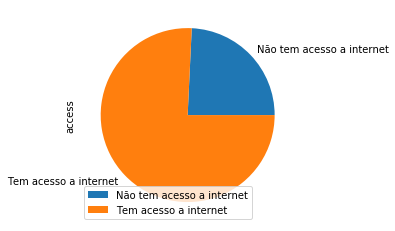

In [11]:
access_amount.plot.pie(subplots=True)

### Métrica da média geral das pessoas que possuem acesso a Internet e que não possuem acesso

In [17]:
'Possui Internet: ' + str(len(exam_average.query("ACESSO_INTERNET == 'A'"))) + ' | ' + 'Não possui Internet: ' + str(len(exam_average.query("ACESSO_INTERNET == 'B'")))

'Possui Internet: 944283 | Não possui Internet: 2949460'

In [14]:
"Média das pessoas que NÃO tem acesso a Internet: {:.2f}".format(exam_average.query("ACESSO_INTERNET == 'A'")['MÉDIA'].mean())

'Média das pessoas que NÃO tem acesso a Internet: 498.88'

In [15]:
"Média das pessoas que TEM acesso a Internet: {:.2f}".format(exam_average.query("ACESSO_INTERNET == 'B'")['MÉDIA'].mean())

'Média das pessoas que TEM acesso a Internet: 542.79'